In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 8)

In [2]:
df = pd.read_csv(f"../../data/sedov_xy_timing.csv")

df["rk_stages"] = df["integrator"].map({"euler": 1, "ssprk2": 2, "ssprk3": 3, "rk4": 4})
df["updates_per_s"] = df.n_iterations * (df.N**2) / df.execution_time

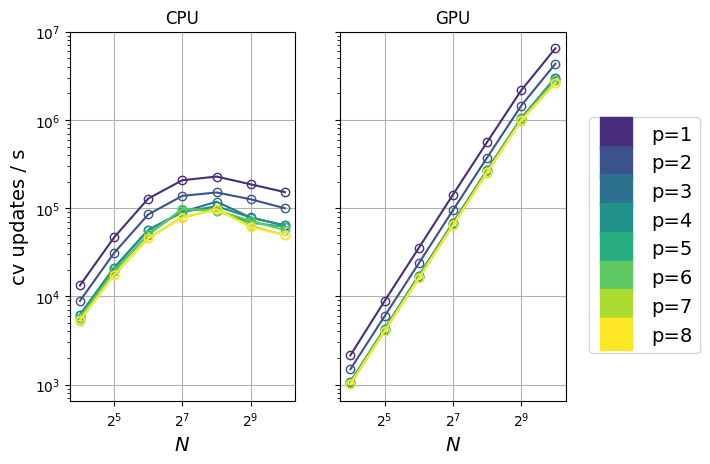

In [3]:
fontsize = 14

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

# filter
df = df[(df.p >= 1)]

for cupy, df_cupy in df.groupby("cupy"):
    for p, df_p in df_cupy.groupby("p"):
        ax[{True: 1, False: 0}[cupy]].plot(
            df_p.N,
            df_p.updates_per_s,
            color=color_p(p),
            label=f"{p=}",
            marker="o",
            mfc="none",
        )

ax[0].set_xscale("log", base=2)
ax[0].set_yscale("log")
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel(r"$N$", fontsize=fontsize)
ax[1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0].set_ylabel("cv updates / s", fontsize=fontsize)
ax[0].set_title("CPU")
ax[1].set_title("GPU")

leg = ax[1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 2, 3, 4, 5, 6, 7, 8]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(f"../../data/sedov_xy_timing.png", dpi=300, bbox_inches="tight")

In [5]:
df = pd.read_csv(f"../../data/sedov_xyz_timing.csv")

df["rk_stages"] = df["integrator"].map({"euler": 1, "ssprk2": 2, "ssprk3": 3, "rk4": 4})
df["updates_per_s"] = df.n_iterations * (df.N**3) / df.execution_time

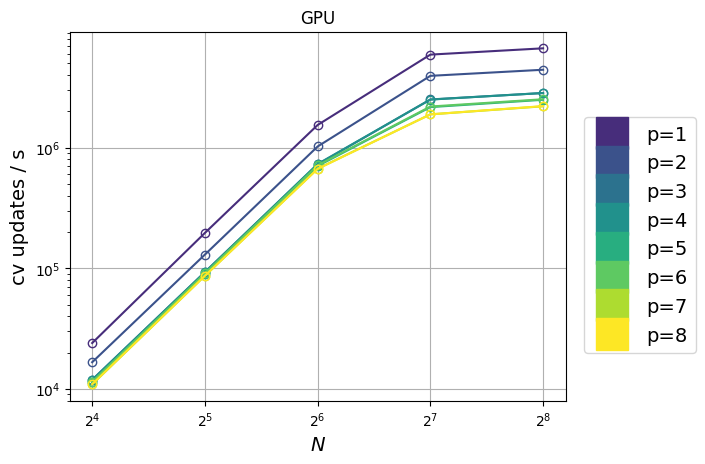

In [10]:
fontsize = 14

fig, ax = plt.subplots()

# filter
df = df[(df.p >= 1)]

for p, df_p in df.groupby("p"):
    ax.plot(
        df_p.N,
        df_p.updates_per_s,
        color=color_p(p),
        label=f"{p=}",
        marker="o",
        mfc="none",
    )

ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.grid()
ax.set_xlabel(r"$N$", fontsize=fontsize)
ax.set_ylabel("cv updates / s", fontsize=fontsize)
ax.set_title("GPU")

leg = ax.legend(loc="center", bbox_to_anchor=(1.15, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 2, 3, 4, 5, 6, 7, 8]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(f"../../data/sedov_xyz_timing.png", dpi=300, bbox_inches="tight")